## 1. Importing Libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import plotly.io as pio
pio.renderers.default='notebook'
from IPython.display import Image

## 2. Loading Dataset

In [2]:
df=pd.read_csv('datasets_42674_74935_Mall_Customers.csv')

In [3]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


The dataset is clean and does not need Data Cleaning.

We rename the columns.

In [ ]:
df.columns=['CustomerID', 'Gender', 'Age', 'Annual Income','Spending Score']

## 3. Exploratory Data Analysis

We visualize the distribution of Age, Annual Income and Spending Score values.

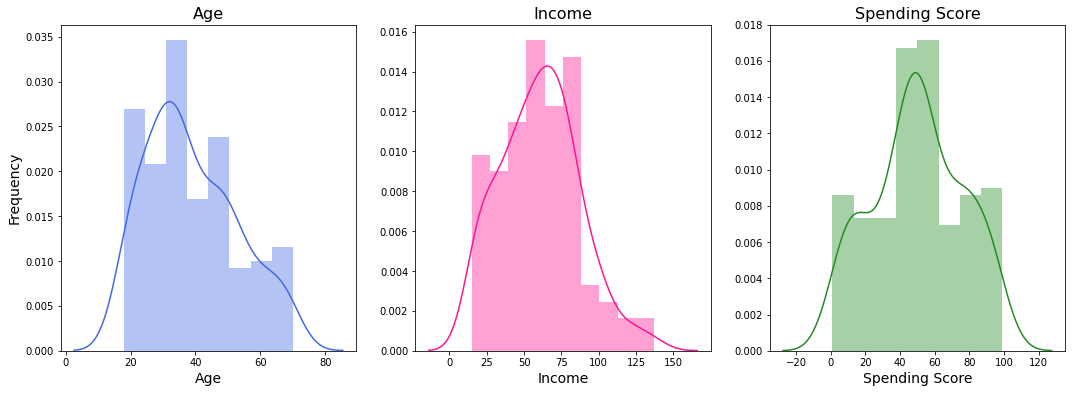

In [7]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.distplot(df['Age'], color='royalblue')
plt.title('Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.subplot(1,3,2)
sns.distplot(df['Annual Income'], color='deeppink')
plt.title('Income', fontsize=16)
plt.xlabel('Income', fontsize=14)

plt.subplot(1,3,3)
sns.distplot(df['Spending Score'], color='forestgreen')
plt.title('Spending Score', fontsize=16)
plt.xlabel('Spending Score', fontsize=14)

plt.show()

We analyze the distribution of Age, Annual Income and Spending Score values based on Gender.

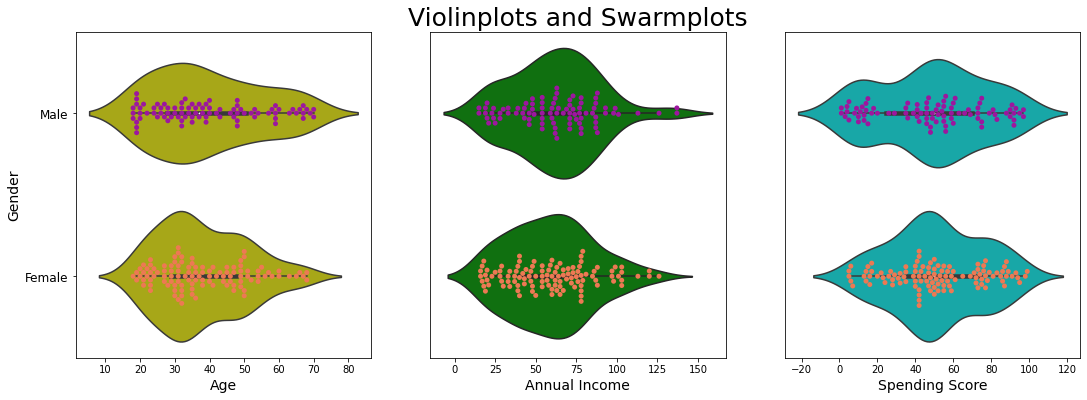

In [8]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.violinplot(x='Age', y='Gender', data=df, color='y')
sns.swarmplot(x='Age', y='Gender', data=df, palette='plasma')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Gender', fontsize=14)
plt.yticks([0,1],['Male','Female'],fontsize=12 )

plt.subplot(1,3,2)
sns.violinplot(x='Annual Income', y='Gender', data=df,color='g')
sns.swarmplot(x='Annual Income', y='Gender', data=df,palette='plasma')
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel(' ')
plt.yticks([])
plt.title('Violinplots and Swarmplots',fontsize=25)

plt.subplot(1,3,3)
sns.violinplot(x='Spending Score', y='Gender', data=df, color='c')
sns.swarmplot(x='Spending Score', y='Gender', data=df,palette='plasma')
plt.xlabel('Spending Score', fontsize=14)
plt.ylabel(' ')
plt.yticks([])

plt.show()

We count the number of male and female customers.

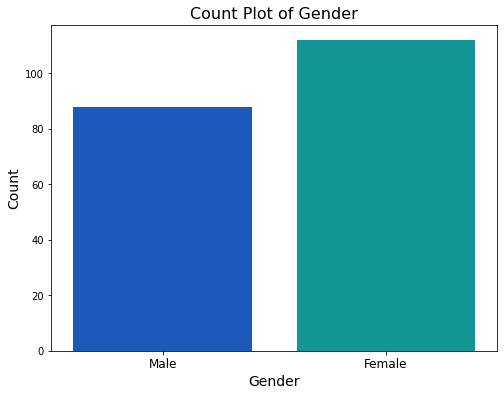

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x='Gender', data=df, palette='winter')
plt.title('Count Plot of Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0,1],['Male','Female'],fontsize=12 )
plt.show()

In the following figures, we visualize the relationship between Age, Annual Income, Spending Score and Gender.

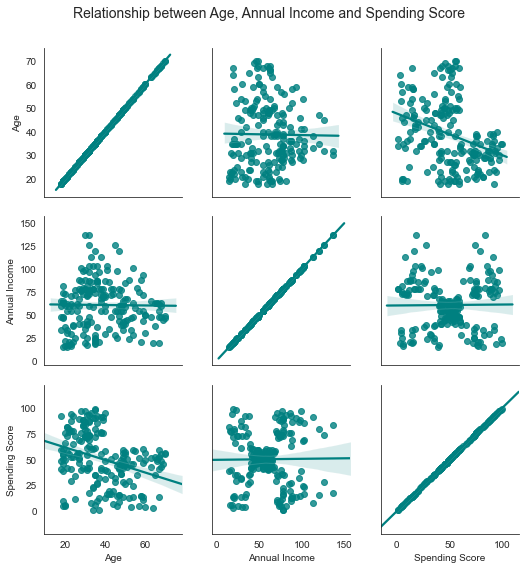

In [10]:
sns.set_style('white')
new=sns.PairGrid(df.drop(['CustomerID', 'Gender'],axis=1))
new.map(sns.regplot, color='teal')
plt.suptitle('Relationship between Age, Annual Income and Spending Score',y=1.05,fontsize=14)
plt.show()

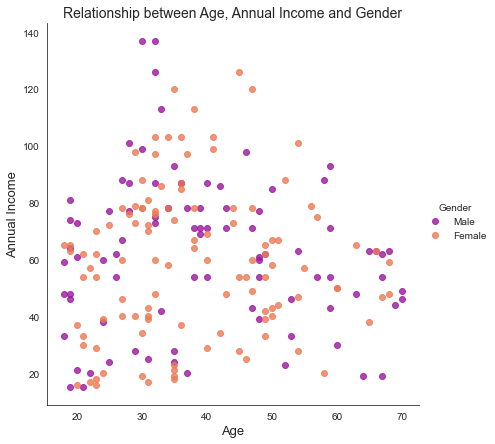

In [11]:
sns.lmplot(x='Age', y='Annual Income', data=df,fit_reg=False, hue='Gender', height=6, palette='plasma')
plt.title('Relationship between Age, Annual Income and Gender', fontsize=14)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Annual Income', fontsize=13)
plt.show()

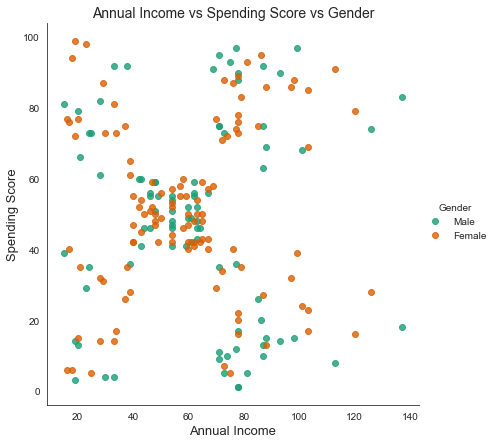

In [12]:
sns.lmplot(x='Annual Income', y='Spending Score', data=df,fit_reg=False, hue='Gender', height=6, palette='Dark2')
plt.title('Annual Income vs Spending Score vs Gender', fontsize=14)
plt.xlabel('Annual Income', fontsize=13)
plt.ylabel('Spending Score', fontsize=13)
plt.show()

## 4. KMeans Clustering

### 4.1. Segmentation Based on Age and Spending Score

#### 4.1.1. Finding the Optimal Number of Clusters 

First, we find the optimal number of clusters by elbow method.

In [13]:
X1=df[['Age','Spending Score']]
inertia1=[]
for n in range(1 , 11):
    model1=KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
    model1.fit(X1)
    inertia1.append(model1.inertia_)
print(inertia1)

[171535.5, 75949.15601023017, 45840.67661610867, 28165.58356662934, 23839.439633173846, 19576.013221355326, 15514.19313435103, 13020.333585858585, 11480.045478271728, 10187.846101364521]


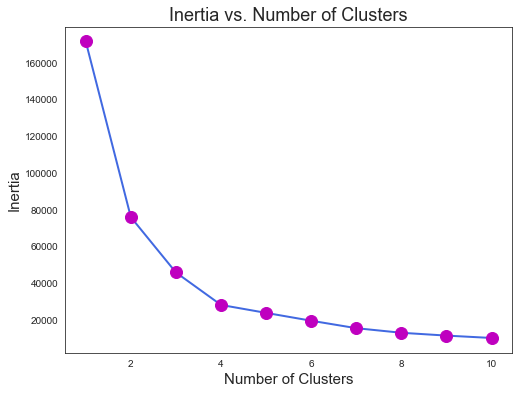

In [14]:
plt.figure(figsize=(8,6))
plt.plot(list(range(1 , 11)), inertia1, color='royalblue', marker='o',linewidth=2, markersize=12, markerfacecolor='m', markeredgecolor='m')
plt.title('Inertia vs. Number of Clusters',fontsize=18)
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15)
plt.show()

We can see that if the number of clusters is smaller than 4, the inertia has a high value but if the number of clusters is larger than 4, the inertia is relatively constant. So we choose 4 as the optimal number of clusters.

#### 4.1.2. Performing Clustering with the Optimal Number of Clusters 

In [15]:
model1=KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
model1.fit(X1)
labels1=model1.labels_
centroids1=model1.cluster_centers_

#### 4.1.3. Visualizing the Clusters 

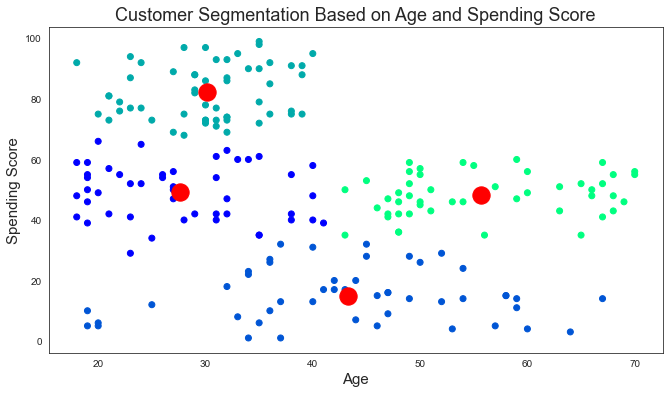

In [16]:
plt.figure(figsize=(11,6))
sns.set_style('white')
plt.scatter(x=df['Age'], y=df['Spending Score'],c=labels1,cmap='winter')
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1], s = 300 , c = 'red')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Spending Score',fontsize=15)
plt.title('Customer Segmentation Based on Age and Spending Score',fontsize=18)
plt.show()

### 4.2. Segmentation Based on Annual Income and Spending Score

#### 4.2.1. Finding the Optimal Number of Clusters 

In [17]:
X2=df[['Annual Income','Spending Score']]
inertia2=[]
for n in range(1,11):
    model2=KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
    model2.fit(X2)
    inertia2.append(model2.inertia_)  
print(inertia2)

[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37239.83554245604, 30259.65720728547, 25018.78161341407, 21862.092672182887, 19664.685196005543]


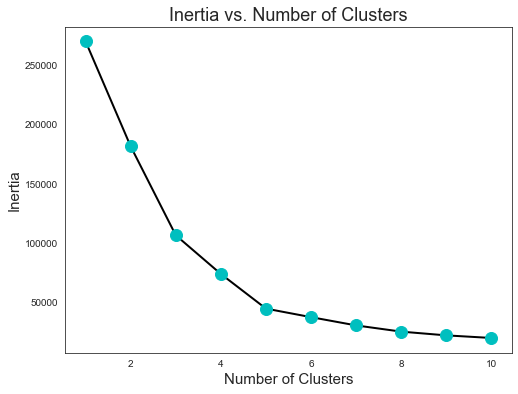

In [18]:
plt.figure(figsize=(8,6))
sns.set_style('white')
plt.plot(list(range(1,11)),inertia2,color='black', marker='o',linewidth=2, markersize=12, markerfacecolor='c', markeredgecolor='c')
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15)
plt.title('Inertia vs. Number of Clusters',fontsize=18)
plt.show()

We can see that if the number of clusters is smaller than 5, the inertia has a high value but if the number of clusters is larger than 5, the inertia is relatively constant. So we choose 5 as the optimal number of clusters.

#### 4.2.2. Performing Clustering with the Optimal Number of Clusters 

In [19]:
model2=KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
model2.fit(X2)
centroids2=model2.cluster_centers_
labels2=model2.labels_

#### 4.2.3. Visualizing the Clusters 

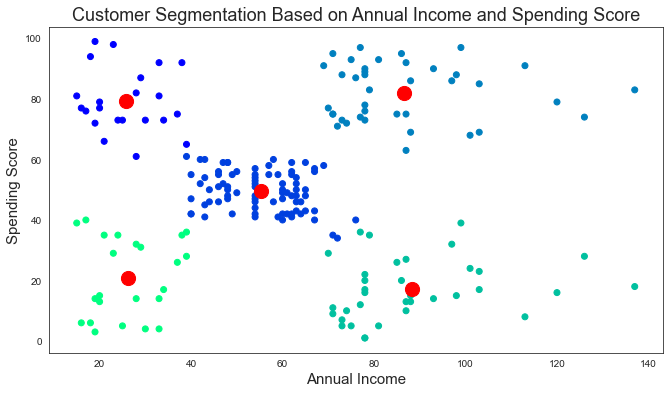

In [20]:
plt.figure(figsize=(11,6))
sns.set_style('white')
plt.scatter(x=df['Annual Income'], y=df['Spending Score'],c=labels2,cmap='winter')
plt.scatter(centroids2[:,0], centroids2[:,1],c='red',s=200)
plt.xlabel('Annual Income',fontsize=15)
plt.ylabel('Spending Score',fontsize=15)
plt.title('Customer Segmentation Based on Annual Income and Spending Score',fontsize=18)
plt.show()

### 4.3. Segmentation Based on Age, Annual Income and Spending Score

#### 4.3.1. Finding the Optimal Number of Clusters 

In [21]:
X3=df[['Age', 'Annual Income', 'Spending Score']]
inertia3=[]
for n in range (1,10):
    model3=KMeans(n_clusters=n,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
    model3.fit(X3)
    inertia3.append(model3.inertia_)
print(inertia3)

[308812.78, 212840.16982097185, 143342.751571706, 104366.15145556198, 75493.84464013916, 58300.44332159069, 51153.283015839996, 44344.280380430384, 40622.67755719132]


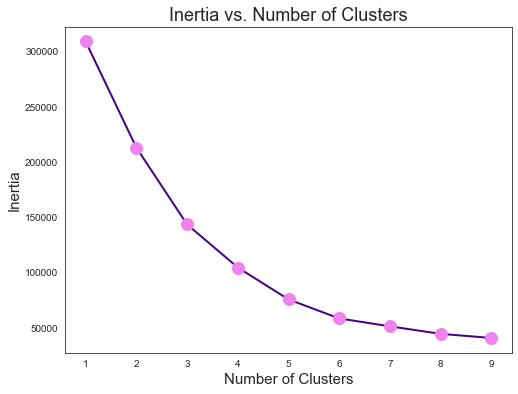

In [25]:
plt.figure(figsize=(8,6))
plt.plot(list(range (1,10)),inertia3, color='indigo',marker='o', linewidth=2, markersize=12, markerfacecolor='violet', markeredgecolor='violet')
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15)
plt.title('Inertia vs. Number of Clusters',fontsize=18)
plt.show()

We can see that if the number of clusters is smaller than 6, the inertia has a high value but if the number of clusters is larger than 6, the inertia is relatively constant. So we choose 6 as the optimal number of clusters.

#### 4.3.2. Performing Clustering with the Optimal Number of Clusters 

In [23]:
model3=KMeans(n_clusters=6,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
model3.fit(X3)
centroids3=model3.cluster_centers_
labels3=model3.labels_

#### 4.3.3. Visualizing the Clusters 

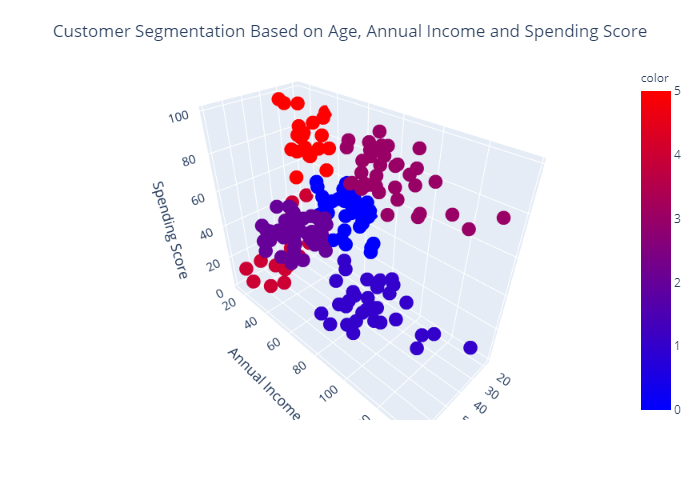

In [28]:
fig=px.scatter_3d(data_frame=df,x='Age',y='Annual Income',z='Spending Score',color=labels3, color_continuous_scale='bluered')
fig.update_layout(
    title={
        'text': 'Customer Segmentation Based on Age, Annual Income and Spending Score',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
Image(pio.to_image(fig,format='png'))

## 5. Conclusion

- In this notebook, we used a dataset of mall customers and performed exploratory data analysis to visualize the relationship between columns.

- We implemented three different segmentation strategies by K-Means Clustering based on:
    - Age and Spending Score
    - Annual Income and Spending Score
    - Age, Annual Income and Spending Score

- The number of clusters were different in different strategies, varying between 4 and 6 groups of customers.